# ตอนที่ 1: การทดลองเตรียมข้อมูลและแสดงรายละเอียดข้อมูลเชิงกราฟ

1.1 Import Lib (numpy, pandas, matplotlib, sklearn, datetime)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import preprocessing
import seaborn as sns
import datetime as dt
from collections import defaultdict

1.2 โหลดข้อมูล MovieLens Dataset file (‘ratings.csv’, ‘movies.csv’, ‘tags.csv’) โดยใช้

In [2]:
data_rating = pd.read_csv('ml-latest-small/ratings.csv')
data_movies = pd.read_csv('ml-latest-small/movies.csv')
data_tags = pd.read_csv('ml-latest-small/tags.csv')
data = [data_rating,data_movies,data_tags]

In [3]:
def set_date(data):
    data['Date'] = pd.to_datetime(data['timestamp'],unit='s')
#     data.sort_values('Date', inplace=True)
set_date(data_rating)
set_date(data_tags)

In [4]:
print("size : ",len(data_rating))
data_rating.head()

size :  100836


,userId,movieId,rating,timestamp,Date
0,1,1,4.0,964982703,2000-07-30 18:45:03
1,1,3,4.0,964981247,2000-07-30 18:20:47
2,1,6,4.0,964982224,2000-07-30 18:37:04
3,1,47,5.0,964983815,2000-07-30 19:03:35
4,1,50,5.0,964982931,2000-07-30 18:48:51


In [5]:
print("size : ",len(data_movies))
data_movies.head()

size :  9742


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:

data_movies['year'] = data_movies['title'].str.split(" ")
data_movies['year'] = data_movies['year'].str[-1]
data_movies['year'] = data_movies['year'].str[-5:-1]
data_movies = data_movies[data_movies['year'].str.isdigit()].dropna()
data_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [7]:
print("size : ",len(data_tags))
data_tags.head()

size :  3683


,userId,movieId,tag,timestamp,Date
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27
4,2,89774,MMA,1445715200,2015-10-24 19:33:20


1.3 Data Preprocessing

    1.3.1 Data Cleaning

In [8]:
for d in data:
    d = d.dropna()
    d = d.drop_duplicates()
data_rating[~data_rating['movieId'].isin(data_movies['movieId'])].dropna(inplace=True)
data_tags[~data_tags['movieId'].isin(data_movies['movieId'])].dropna(inplace=True)

C:\Users\beamconan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\beamconan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
print("data_rating size : ",len(data_rating))
print("data_movies size : ",len(data_movies))
print("data_tags size : ",len(data_tags))

data_rating size :  100836
data_movies size :  9719
data_tags size :  3683


    1.3.2 Data Preparation

        - เตรียมข้อมูล movie rating ด้วยการดึงข้อมูลปีคศ. (‘year’) จากข้อมูล UTC ‘timestamp’

In [10]:
data_rating['year'] = pd.DatetimeIndex(data_rating['Date']).year
data_rating

,userId,movieId,rating,timestamp,Date,year
0,1,1,4.0,964982703,2000-07-30 18:45:03,2000
1,1,3,4.0,964981247,2000-07-30 18:20:47,2000
2,1,6,4.0,964982224,2000-07-30 18:37:04,2000
3,1,47,5.0,964983815,2000-07-30 19:03:35,2000
4,1,50,5.0,964982931,2000-07-30 18:48:51,2000
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,2017-05-03 21:53:22,2017
100832,610,168248,5.0,1493850091,2017-05-03 22:21:31,2017
100833,610,168250,5.0,1494273047,2017-05-08 19:50:47,2017
100834,610,168252,5.0,1493846352,2017-05-03 21:19:12,2017


        - เตรียมข้อมูล movie genre feature โดยกำหนดให้มีคอลัมน์ดังนี้โดยกำหนดให้ปรับรูปแบบ genres เป็น multi-label binarization

In [11]:
all_genres = []
mlb = preprocessing.MultiLabelBinarizer()

for _, row in data_movies.iterrows():
    all_genres.append(set(row.genres.split("|")))
data_genres = pd.DataFrame(mlb.fit_transform(all_genres),columns=mlb.classes_)

data_movies = pd.concat([data_movies,data_genres.reindex(data_movies.index)],axis=1)
data_movies = data_movies.rename(columns={"(no genres listed)":"No genres Listed"})
data_movies = data_movies.dropna()
data_movies


,movieId,title,genres,year,No genres Listed,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,1995,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9714,188675,Dogman (2018),Crime|Drama,2018,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9715,188751,Mamma Mia: Here We Go Again! (2018),Comedy|Romance,2018,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9716,188797,Tag (2018),Comedy,2018,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9717,188833,The Man Who Killed Don Quixote (2018),Adventure|Comedy|Fantasy,2018,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1.4 Data Visualization แสดงกราฟข้อมูลการเปลี่ยนแปลงของ movie genres และ movie rating ในแต่ละปี

    - กราฟที่ 1: แสดงกราฟค่า จำนวน released movies ในแต่ละปี

In [12]:
from itertools import cycle, islice

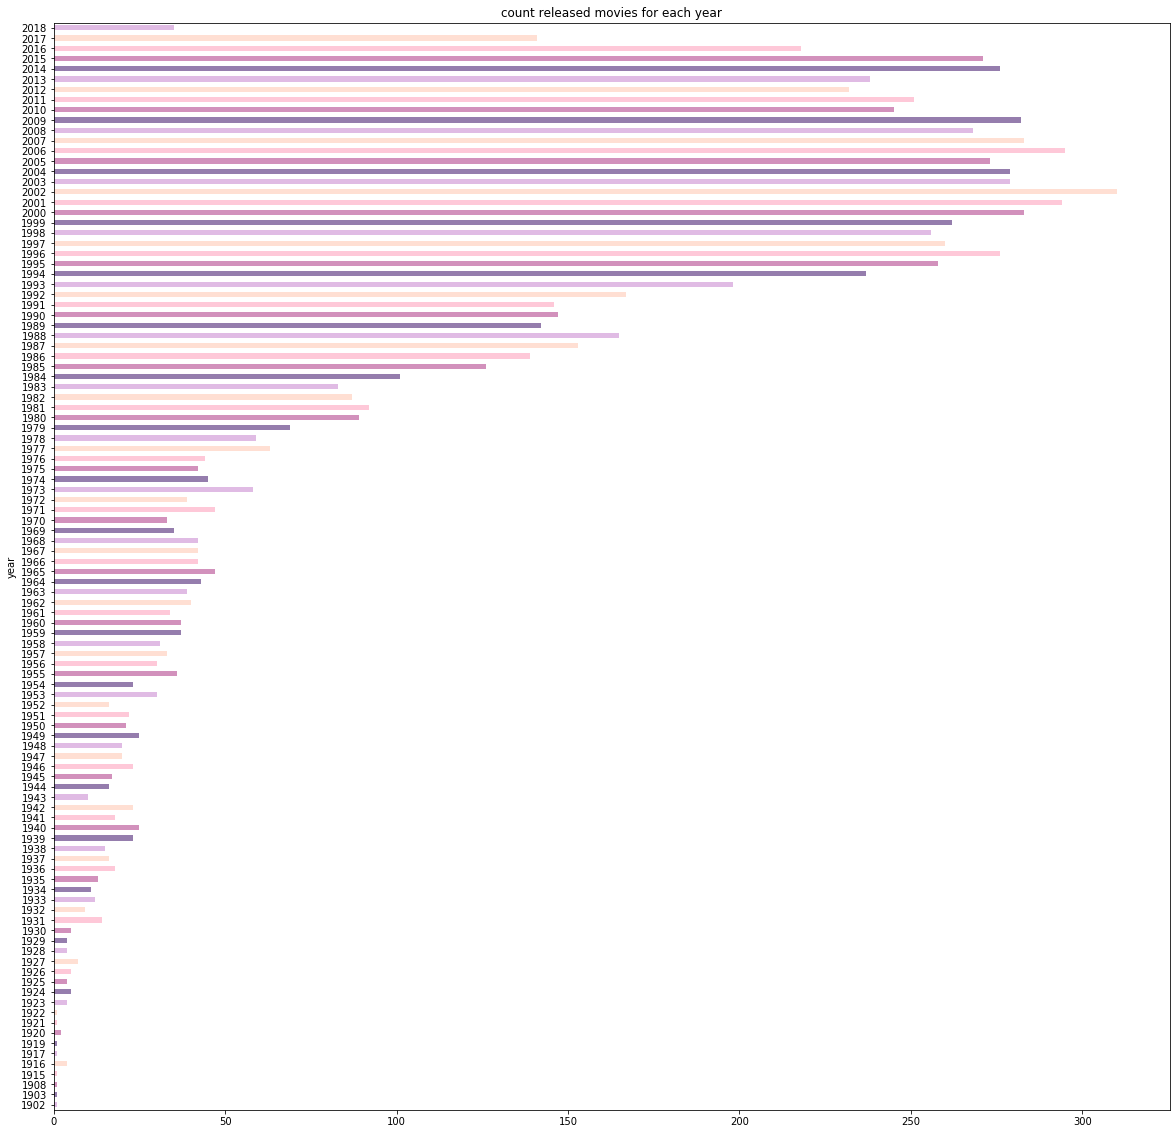

In [13]:
my_colors = list(islice(cycle(['#E0BBE4', '#957DAD', '#D291BC', '#FEC8D8', '#FFDFD3']), None, len(data_movies)))
# data_movies['year'].value_counts().plot(kind='barh',figsize=(30,30),color=my_colors)
data_movies.groupby('year')["year"].count().plot(kind='barh',figsize=(20,20),color=my_colors,title = 'count released movies for each year')

    - กราฟที่ 2: แสดงกราฟค่า จำนวนการให้ rating ในแต่ละปี

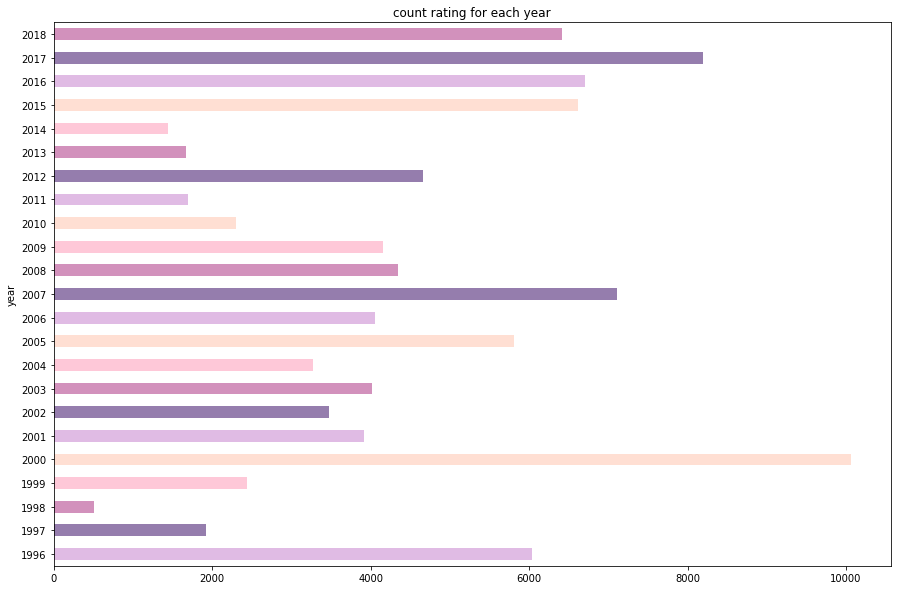

In [14]:
data_rating.groupby('year')["year"].count().plot(kind='barh',figsize=(15,10),color=my_colors,title = 'count rating for each year')

    - กราฟที่ 3: แสดงกราฟค่า จำนวน movies ในแต่ละ genre

C:\Users\beamconan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


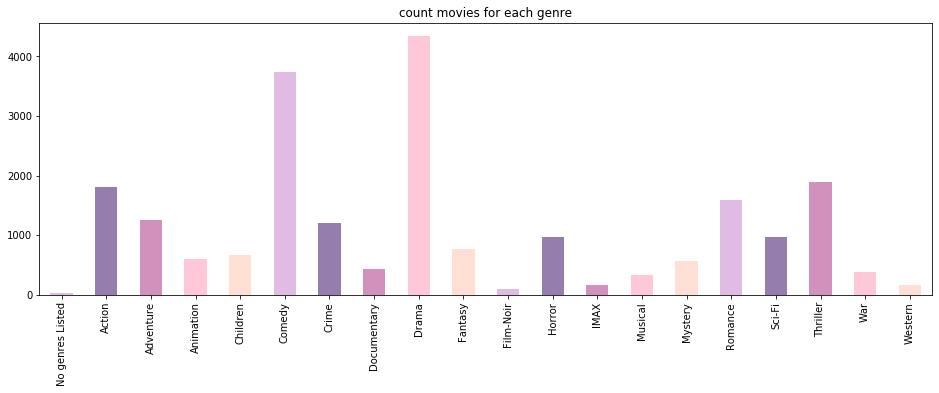

In [15]:
data_movies.sum(axis='rows').iloc[4:].plot(kind='bar',figsize=(16,5),colors=my_colors,title = 'count movies for each genre')

    - กราฟที่ 4: แสดงกราฟ (y-axis: stacked graph) ค่าจำนวน movie แต่ละ genre ในแต่ละปี (x-axis)

In [16]:
_data = pd.DataFrame(data_movies.groupby('year').sum().astype(np.int64),columns=data_movies.columns[4:])
_data

,No genres Listed,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,
1902,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1903,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1908,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1915,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1916,0,1,0,0,0,1,2,0,1,0,0,0,0,0,2,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,1,63,41,26,18,110,32,15,109,18,0,28,11,5,13,28,35,51,9,4
2015,6,59,44,34,20,116,26,17,82,26,1,31,0,0,18,17,45,44,4,3
2016,5,48,26,36,17,77,17,13,70,23,0,19,0,0,8,19,26,38,3,4


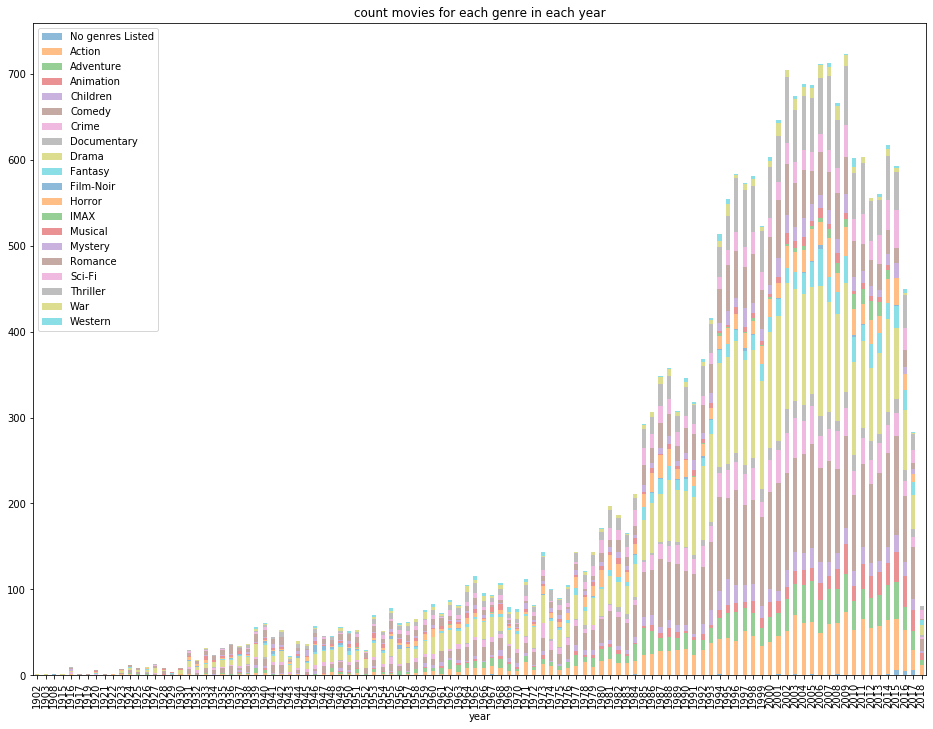

In [17]:
_data.plot(kind='bar',stacked = True,alpha = 0.5,figsize=(16,12),title = 'count movies for each genre in each year')

    - กราฟที่ 5: แสดงกราฟ Histogram ของการกระจายของค่าเฉลี่ย movie rating ใน dataset โดยค่าเฉลี่ย movie rating คำนวณจาก ค่า rating เฉลี่ยของแต่ละ movie เพื่อเป็นข้อมูล input ให้กับ histogram (โดยให้กำหนดจำนวน histogram bins ที่จะเห็นรายละเอียด)

In [18]:
_data = pd.DataFrame(data_rating.groupby('movieId').mean(),columns=['rating'])
_data = _data.reset_index()

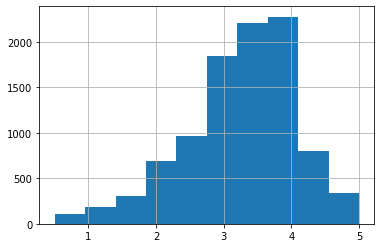

In [19]:
_data['rating'].hist(bins=10)

# ตอนที่ 3: การทดลองสร้างระบบแนะนำสินค้า (Recommendation system) จากข้อมูล movie_matrix

3.1 คำนวณความคล้ายกันของ movie genre ของคู่ ‘movieId’ ใดๆ จากตาราง movie genre feature
จากข้อ 1.3.2

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
from numpy.random import RandomState

    3.1.1 สุ่มหยิบข้อมูล movie_matrix จำนวน n movies จาก movie genre feature (ไม่น้อยกว่า 20 เรื่อง)

In [21]:
movie_matrix = data_movies.drop(columns=['title','genres','year']).set_index('movieId')
movie_matrix = movie_matrix.sample(20,random_state=42)
movie_matrix

,No genres Listed,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
69453,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79501,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
61026,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83132,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1396,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
168712,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95654,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


    3.2.2 คำนวณโดยใช้ตัววัด cosine_similarity() สำหรับข้อมูล movie_matrix

In [22]:
df_cosine_sim = pd.DataFrame(cosine_similarity(movie_matrix))
df_cosine_sim.index = df_cosine_sim.index.map({i:movie_matrix.index.values[i] for i in range(0,20)})
df_cosine_sim = df_cosine_sim.rename(columns=({i:movie_matrix.index.values[i] for i in range(0,20)}))
df_cosine_sim

,69453,79501,61026,2775,43,83132,1396,168712,95654,7016,26606,416,47774,117922,101529,1232,4966,103042,7939,64497
69453,1.000000,0.000000,0.000000,0.577350,0.577350,0.235702,0.516398,0.00000,0.000000,0.408248,0.000000,0.0,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.577350,0.816497
79501,0.000000,1.000000,0.353553,0.000000,0.000000,0.288675,0.316228,0.00000,0.000000,0.000000,0.353553,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
61026,0.000000,0.353553,1.000000,0.000000,0.000000,0.408248,0.447214,0.00000,0.577350,0.353553,0.250000,0.0,0.000000,0.353553,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000
2775,0.577350,0.000000,0.000000,1.000000,1.000000,0.000000,0.447214,0.00000,0.000000,0.707107,0.000000,0.0,0.000000,0.000000,0.577350,0.577350,0.000000,0.000000,1.000000,0.707107
43,0.577350,0.000000,0.000000,1.000000,1.000000,0.000000,0.447214,0.00000,0.000000,0.707107,0.000000,0.0,0.000000,0.000000,0.577350,0.577350,0.000000,0.000000,1.000000,0.707107
83132,0.235702,0.288675,0.408248,0.000000,0.000000,1.000000,0.547723,0.00000,0.235702,0.288675,0.408248,0.0,0.235702,0.288675,0.235702,0.000000,0.288675,0.288675,0.000000,0.288675
1396,0.516398,0.316228,0.447214,0.447214,0.447214,0.547723,1.000000,0.00000,0.258199,0.632456,0.223607,0.0,0.000000,0.000000,0.258199,0.516398,0.316228,0.000000,0.447214,0.632456
168712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.577350,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95654,0.000000,0.000000,0.577350,0.000000,0.000000,0.235702,0.258199,0.57735,1.000000,0.408248,0.288675,0.0,0.000000,0.408248,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
7016,0.408248,0.000000,0.353553,0.707107,0.707107,0.288675,0.632456,0.00000,0.408248,1.000000,0.353553,0.0,0.000000,0.000000,0.408248,0.408248,0.000000,0.000000,0.707107,0.500000


    3.2.3 คำนวณโดยใช้ตัววัด Pearson’s similarity สำหรับข้อมูล movie_matrix

In [23]:
movie_matrix.T.corr(method='pearson')

movieId,69453,79501,61026,2775,43,83132,1396,168712,95654,7016,26606,416,47774,117922,101529,1232,4966,103042,7939,64497
movieId,,,,,,,,,,,,,,,,,,,,
69453,1.000000,-0.140028,-0.210042,0.546119,0.546119,0.030557,4.042260e-01,-0.096374,-0.176471,0.326732,-2.100420e-01,-0.096374,-0.176471,-0.140028,0.215686,0.215686,-0.140028,-0.140028,0.546119,0.793492
79501,-0.140028,1.000000,0.250000,-0.076472,-0.076472,0.145479,1.924501e-01,-0.076472,-0.140028,-0.111111,2.500000e-01,-0.076472,-0.140028,-0.111111,-0.140028,-0.140028,-0.111111,-0.111111,-0.076472,-0.111111
61026,-0.210042,0.250000,1.000000,-0.114708,-0.114708,0.218218,2.886751e-01,-0.114708,0.490098,0.250000,6.250000e-02,-0.114708,-0.210042,0.250000,0.140028,-0.210042,-0.166667,-0.166667,-0.114708,-0.166667
2775,0.546119,-0.076472,-0.114708,1.000000,1.000000,-0.150188,3.973597e-01,-0.052632,-0.096374,0.688247,-1.147079e-01,-0.052632,-0.096374,-0.076472,0.546119,0.546119,-0.076472,-0.076472,1.000000,0.688247
43,0.546119,-0.076472,-0.114708,1.000000,1.000000,-0.150188,3.973597e-01,-0.052632,-0.096374,0.688247,-1.147079e-01,-0.052632,-0.096374,-0.076472,0.546119,0.546119,-0.076472,-0.076472,1.000000,0.688247
83132,0.030557,0.145479,0.218218,-0.150188,-0.150188,1.000000,3.779645e-01,-0.150188,0.030557,0.145479,2.182179e-01,-0.150188,0.030557,0.145479,0.030557,-0.275010,0.145479,0.145479,-0.150188,0.145479
1396,0.404226,0.192450,0.288675,0.397360,0.397360,0.377964,1.000000e+00,-0.132453,0.080845,0.577350,6.009258e-17,-0.132453,-0.242536,-0.192450,0.080845,0.404226,0.192450,-0.192450,0.397360,0.577350
168712,-0.096374,-0.076472,-0.114708,-0.052632,-0.052632,-0.150188,-1.324532e-01,1.000000,0.546119,-0.076472,-1.147079e-01,-0.052632,-0.096374,-0.076472,-0.096374,-0.096374,-0.076472,-0.076472,-0.052632,-0.076472
95654,-0.176471,-0.140028,0.490098,-0.096374,-0.096374,0.030557,8.084521e-02,0.546119,1.000000,0.326732,1.400280e-01,-0.096374,-0.176471,0.326732,0.215686,-0.176471,-0.140028,-0.140028,-0.096374,-0.140028


3.2 แสดงรูปภาพ

    3.2.1 รายการของ movie ที่มีประเภท (genre) คล้ายกันที่สุด 5 อันดับ พร้อมค่า Pearson’s Sim

In [24]:
df_pearson_sim = pd.DataFrame(np.array(movie_matrix.T.corr(method='pearson')))
df_pearson_sim.index = df_pearson_sim.index.map({i:movie_matrix.index.values[i] for i in range(0,20)})
df_pearson_sim = df_pearson_sim.rename(columns=({i:movie_matrix.index.values[i] for i in range(0,20)}))
# df_pearson_sim

In [25]:
df_pearson_sim_table = pd.DataFrame(df_pearson_sim.unstack().reset_index()).rename(
    columns={"level_0":"movieId1","level_1":"movieId2",0:"Pearson’s similarity"})
df_pearson_sim_table = df_pearson_sim_table.loc[df_pearson_sim_table['movieId1']!=df_pearson_sim_table['movieId2']]
_df_pearson_sim_table = df_pearson_sim_table.sort_values(
    by=["Pearson’s similarity","movieId1","movieId2"],ascending=False)
_df_pearson_sim_table.drop_duplicates(subset='Pearson’s similarity', keep="first",inplace=True)

_df_pearson_sim_table['movie1 title'] = _df_pearson_sim_table.movieId1.apply(
    lambda x: data_movies[data_movies.movieId == x].title.values[0])
_df_pearson_sim_table['movie1 genres'] = _df_pearson_sim_table.movieId1.apply(
    lambda x: data_movies[data_movies.movieId == x].genres.values[0])

_df_pearson_sim_table['movie2 title'] = _df_pearson_sim_table.movieId2.apply(
    lambda x: data_movies[data_movies.movieId == x].title.values[0])
_df_pearson_sim_table['movie2 genres'] = _df_pearson_sim_table.movieId2.apply(
    lambda x: data_movies[data_movies.movieId == x].genres.values[0])

_df_pearson_sim_table = pd.DataFrame(_df_pearson_sim_table.iloc[:5],columns=['movieId1','movie1 title','movie1 genres',
                                                     'movieId2','movie2 title','movie2 genres',
                                                     'Pearson’s similarity'])
_df_pearson_sim_table

,movieId1,movie1 title,movie1 genres,movieId2,movie2 title,movie2 genres,Pearson’s similarity
363,7939,Through a Glass Darkly (Såsom i en spegel) (1961),Drama,2775,Head On (1998),Drama,1.000000
352,103042,Man of Steel (2013),Action|Adventure|Fantasy|Sci-Fi|IMAX,47774,"Icicle Thief, The (Ladri di saponette) (1989)",Comedy|Fantasy,0.793492
19,69453,"Land That Time Forgot, The (1975)",Adventure|Sci-Fi,64497,"Day the Earth Stood Still, The (2008)",Drama|Sci-Fi|Thriller|IMAX,0.793492
398,64497,"Day the Earth Stood Still, The (2008)",Drama|Sci-Fi|Thriller|IMAX,7939,Through a Glass Darkly (Såsom i en spegel) (1961),Drama,0.688247
386,64497,"Day the Earth Stood Still, The (2008)",Drama|Sci-Fi|Thriller|IMAX,1396,Sneakers (1992),Action|Comedy|Crime|Drama|Sci-Fi,0.577350


    3.2.2 รายการของ movie ที่มีประเภท (genre) ตรงข้ามกันที่สุด 5 อันดับ พร้อมค่า Pearson’s Sim

In [26]:
_df_pearson_sim_invert_table = df_pearson_sim_table.sort_values(
    by=["Pearson’s similarity","movieId1","movieId2"],ascending=True)
_df_pearson_sim_invert_table.drop_duplicates(subset='Pearson’s similarity', keep="first",inplace=True)

_df_pearson_sim_invert_table['movie1 title'] = _df_pearson_sim_invert_table.movieId1.apply(
    lambda x: data_movies[data_movies.movieId == x].title.values[0])
_df_pearson_sim_invert_table['movie1 genres'] = _df_pearson_sim_invert_table.movieId1.apply(
    lambda x: data_movies[data_movies.movieId == x].genres.values[0])

_df_pearson_sim_invert_table['movie2 title'] = _df_pearson_sim_invert_table.movieId2.apply(
    lambda x: data_movies[data_movies.movieId == x].title.values[0])
_df_pearson_sim_invert_table['movie2 genres'] = _df_pearson_sim_invert_table.movieId2.apply(
    lambda x: data_movies[data_movies.movieId == x].genres.values[0])

pd.DataFrame(_df_pearson_sim_invert_table.iloc[:5],columns=['movieId1','movie1 title','movie1 genres',
                                                            'movieId2','movie2 title','movie2 genres',
                                                            'Pearson’s similarity'])

,movieId1,movie1 title,movie1 genres,movieId2,movie2 title,movie2 genres,Pearson’s similarity
305,1232,Stalker (1979),Drama|Mystery|Sci-Fi,83132,"Secret World of Arrietty, The (Kari-gurashi no...",Animation|Children|Fantasy,-0.275010
132,1396,Sneakers (1992),Action|Comedy|Crime|Drama|Sci-Fi,47774,"Icicle Thief, The (Ladri di saponette) (1989)",Comedy|Fantasy,-0.242536
310,1232,Stalker (1979),Drama|Mystery|Sci-Fi,26606,"Chinese Ghost Story, A (Sinnui yauwan) (1987)",Action|Fantasy|Horror|Romance,-0.210042
302,1232,Stalker (1979),Drama|Mystery|Sci-Fi,61026,Red Cliff (Chi bi) (2008),Action|Adventure|Drama|War,-0.210042
137,1396,Sneakers (1992),Action|Comedy|Crime|Drama|Sci-Fi,103042,Man of Steel (2013),Action|Adventure|Fantasy|Sci-Fi|IMAX,-0.192450


    3.2.3 รายการของ user ที่ให้ rating >= 3.0 ซึ่งสามารถแนะนำ movie ในรายการข้อ 3.2.1 ให้ได้

In [27]:
df = pd.DataFrame(columns=['userId','movieId','rating'])
for i in _df_pearson_sim_table.movieId1.values:
    df = pd.concat([df,data_rating.loc[
        np.logical_and(data_rating.rating >= 3.0, data_rating.movieId == i),
        data_rating.columns[:3]]])
df = pd.DataFrame(df,columns=['userId','rating','movieId'])
df = df.rename(columns={"movieId":"movieId1"})
# df

In [28]:
df['movie1 title'] = df.movieId1.apply(
    lambda x: _df_pearson_sim_table[_df_pearson_sim_table.movieId1 == x]['movie1 title'].values[0])
df['movie1 genres'] = df.movieId1.apply(
    lambda x: _df_pearson_sim_table[_df_pearson_sim_table.movieId1 == x]['movie1 genres'].values[0])

df['movieId2'] = df.movieId1.apply(
    lambda x: _df_pearson_sim_table[_df_pearson_sim_table.movieId1 == x]['movieId2'].values[0])
df['movie2 title'] = df.movieId1.apply(
    lambda x: _df_pearson_sim_table[_df_pearson_sim_table.movieId1 == x]['movie2 title'].values[0])
df['movie2 genres'] = df.movieId1.apply(
    lambda x: _df_pearson_sim_table[_df_pearson_sim_table.movieId1 == x]['movie2 genres'].values[0])

df['Pearson’s similarity'] = df.movieId1.apply(
    lambda x: _df_pearson_sim_table[_df_pearson_sim_table.movieId1 == x]['Pearson’s similarity'].values[0])
df

,userId,rating,movieId1,movie1 title,movie1 genres,movieId2,movie2 title,movie2 genres,Pearson’s similarity
60086,387,4.5,7939,Through a Glass Darkly (Såsom i en spegel) (1961),Drama,2775,Head On (1998),Drama,1.000000
9053,62,3.5,103042,Man of Steel (2013),Action|Adventure|Fantasy|Sci-Fi|IMAX,47774,"Icicle Thief, The (Ladri di saponette) (1989)",Comedy|Fantasy,0.793492
11586,68,4.5,103042,Man of Steel (2013),Action|Adventure|Fantasy|Sci-Fi|IMAX,47774,"Icicle Thief, The (Ladri di saponette) (1989)",Comedy|Fantasy,0.793492
19087,122,4.0,103042,Man of Steel (2013),Action|Adventure|Fantasy|Sci-Fi|IMAX,47774,"Icicle Thief, The (Ladri di saponette) (1989)",Comedy|Fantasy,0.793492
27164,184,3.0,103042,Man of Steel (2013),Action|Adventure|Fantasy|Sci-Fi|IMAX,47774,"Icicle Thief, The (Ladri di saponette) (1989)",Comedy|Fantasy,0.793492
37253,249,4.0,103042,Man of Steel (2013),Action|Adventure|Fantasy|Sci-Fi|IMAX,47774,"Icicle Thief, The (Ladri di saponette) (1989)",Comedy|Fantasy,0.793492
46505,305,4.0,103042,Man of Steel (2013),Action|Adventure|Fantasy|Sci-Fi|IMAX,47774,"Icicle Thief, The (Ladri di saponette) (1989)",Comedy|Fantasy,0.793492
57962,380,3.0,103042,Man of Steel (2013),Action|Adventure|Fantasy|Sci-Fi|IMAX,47774,"Icicle Thief, The (Ladri di saponette) (1989)",Comedy|Fantasy,0.793492
58816,382,4.0,103042,Man of Steel (2013),Action|Adventure|Fantasy|Sci-Fi|IMAX,47774,"Icicle Thief, The (Ladri di saponette) (1989)",Comedy|Fantasy,0.793492
61690,408,4.5,103042,Man of Steel (2013),Action|Adventure|Fantasy|Sci-Fi|IMAX,47774,"Icicle Thief, The (Ladri di saponette) (1989)",Comedy|Fantasy,0.793492
